# Geospatial big data analytics. 2020. NTUA

## Machine Learning with scikit-learn

### Binary Classification

Examples with:

- [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes)
- [k-NN](https://scikit-learn.org/stable/modules/neighbors.html#classification)
- [Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron)


[1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0
 1 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1] (100, 2)


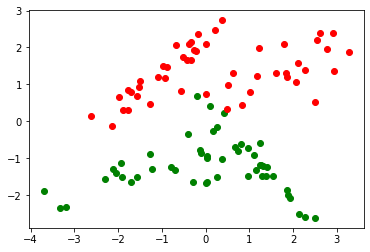

In [0]:
# Let's make some fictitious data! See: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
%matplotlib inline

X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_classes=2,
    n_redundant=0,
    n_informative=2,
    class_sep=1.2,
    random_state=101
)
print(y, X.shape)
plt.plot(X[y==0][:, 0], X[y==0][:, 1], 'go')
plt.plot(X[y==1][:, 0], X[y==1][:, 1], 'ro')



In [0]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [0]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(f'Number of mislabeled points out of a total {X_test.shape[0]} points: {(y_pred != y_test).sum()}')

Number of mislabeled points out of a total 30 points: 2


In [0]:
# k Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f'Number of mislabeled points out of a total {X_test.shape[0]} points: {(y_pred != y_test).sum()}')

Number of mislabeled points out of a total 30 points: 0


In [0]:
# Perceptron
from sklearn.linear_model import Perceptron
perc = Perceptron(random_state=101)
perc.fit(X_train, y_train)
y_pred = perc.predict(X_test)
print(f'Number of mislabeled points out of a total {X_test.shape[0]} points: {(y_pred != y_test).sum()}')

Number of mislabeled points out of a total 30 points: 2


### Multiclass Classification

Examples with:

- kNN
- [Support Vector Machine (SVM)](https://scikit-learn.org/stable/modules/svm.html#svm)
- [Random Forest](https://scikit-learn.org/stable/modules/ensemble.html#ensemble)



In [0]:
import urllib.request
import pandas as pd

iris_data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
urllib.request.urlretrieve(iris_data_url, 'iris.data')

dataset = pd.read_csv('iris.data', header=None)
dataset.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
print(dataset.head())

   sepal_length  sepal_width  petal_length  petal_width        label
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [0]:
# Split the data to X (values) and y (labels)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [0]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [0]:
# Feature scaling 
# ...so that all of them can be uniformly evaluated

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
# kNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=4)

# Training
classifier.fit(X_train, y_train)

# Prediction
y_pred = classifier.predict(X_test)

# Evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [0]:
# K value vs Mean Error

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

error = []

# Calculating error for K values between 1 and 20
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

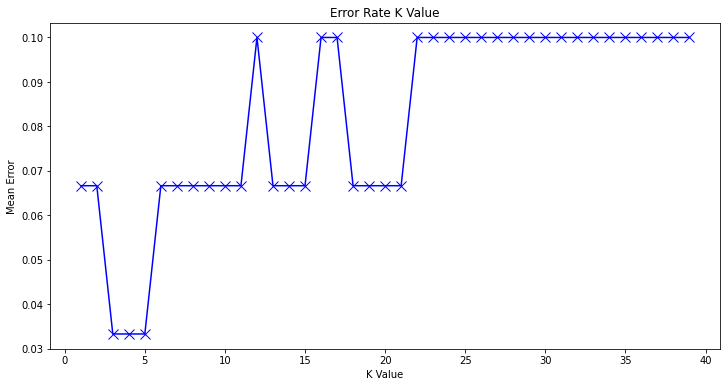

In [0]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='blue', marker='x',
         markerfacecolor='green', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [0]:
# SVM

from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
# Training
svclassifier.fit(X_train, y_train)
# Prediction
y_pred = svclassifier.predict(X_test)

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report\n')
print(classification_report(y_test,y_pred))

Confusion Matrix

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]] 

Classification Report

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [0]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=15, random_state=101)
# Training
rf.fit(X_train, y_train)
# Prediction
y_pred = rf.predict(X_test)
# Evaluation
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix\n')
print(confusion_matrix(y_test,y_pred),'\n')
print('Classification Report\n')
print(classification_report(y_test,y_pred))

Confusion Matrix

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]] 

Classification Report

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

